## **Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
Path = "/content/drive/MyDrive/Banking.csv"
df = pd.read_csv(Path)

## **Data Analysis**

In [5]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [6]:
df.shape

(164309, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,75930.0,3.422936e+01,21.761180,0.0,16.00,31.00,50.00,180.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [9]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [10]:
# lấy danh sách các cột categorical và numerical
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "object"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "object"]

*Numerical*

In [11]:
# Liệt kê giá trị ở mỗi cột
for col in numerical_cols:
    print(f"Unique values in column {col}: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print('\n')

Unique values in column Loan_ID: 164309
Unique values: [10000001 10000002 10000003 ... 10164307 10164308 10164309]


Unique values in column Annual_Income: 12305
Unique values: [68000.      nan 75566.4 ... 51024.  28721.4 24864. ]


Unique values in column Debt_To_Income: 3953
Unique values: [18.37 14.93 15.88 ... 38.03 39.04 35.06]


Unique values in column Inquiries_Last_6Mo: 9
Unique values: [0 3 1 2 4 5 6 7 8]


Unique values in column Months_Since_Deliquency: 122
Unique values: [ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  39.  30.  32.  18.  24.  47.  66.  19.  76.   4.  29.
  45.  38.  56.  37.  20.  35.   2.   9.  34.  14.  59.  36.  50.  81.
  72.  69.  57.  25.   7.  49.  31.  78.  70.  27.   5.  51.  58.  75.
  42.  74.  40.  67.  61.  55.  77.  54.   0.  60.  73.  79.  82.  80.
  83.  88. 127. 106.  99.  97. 139.  96. 119. 116.  94. 141.  86.  91.
  84.  85.  95.

In [12]:
df[numerical_cols].isnull().sum()

Loan_ID                        0
Annual_Income              25102
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Interest_Rate                  0
dtype: int64

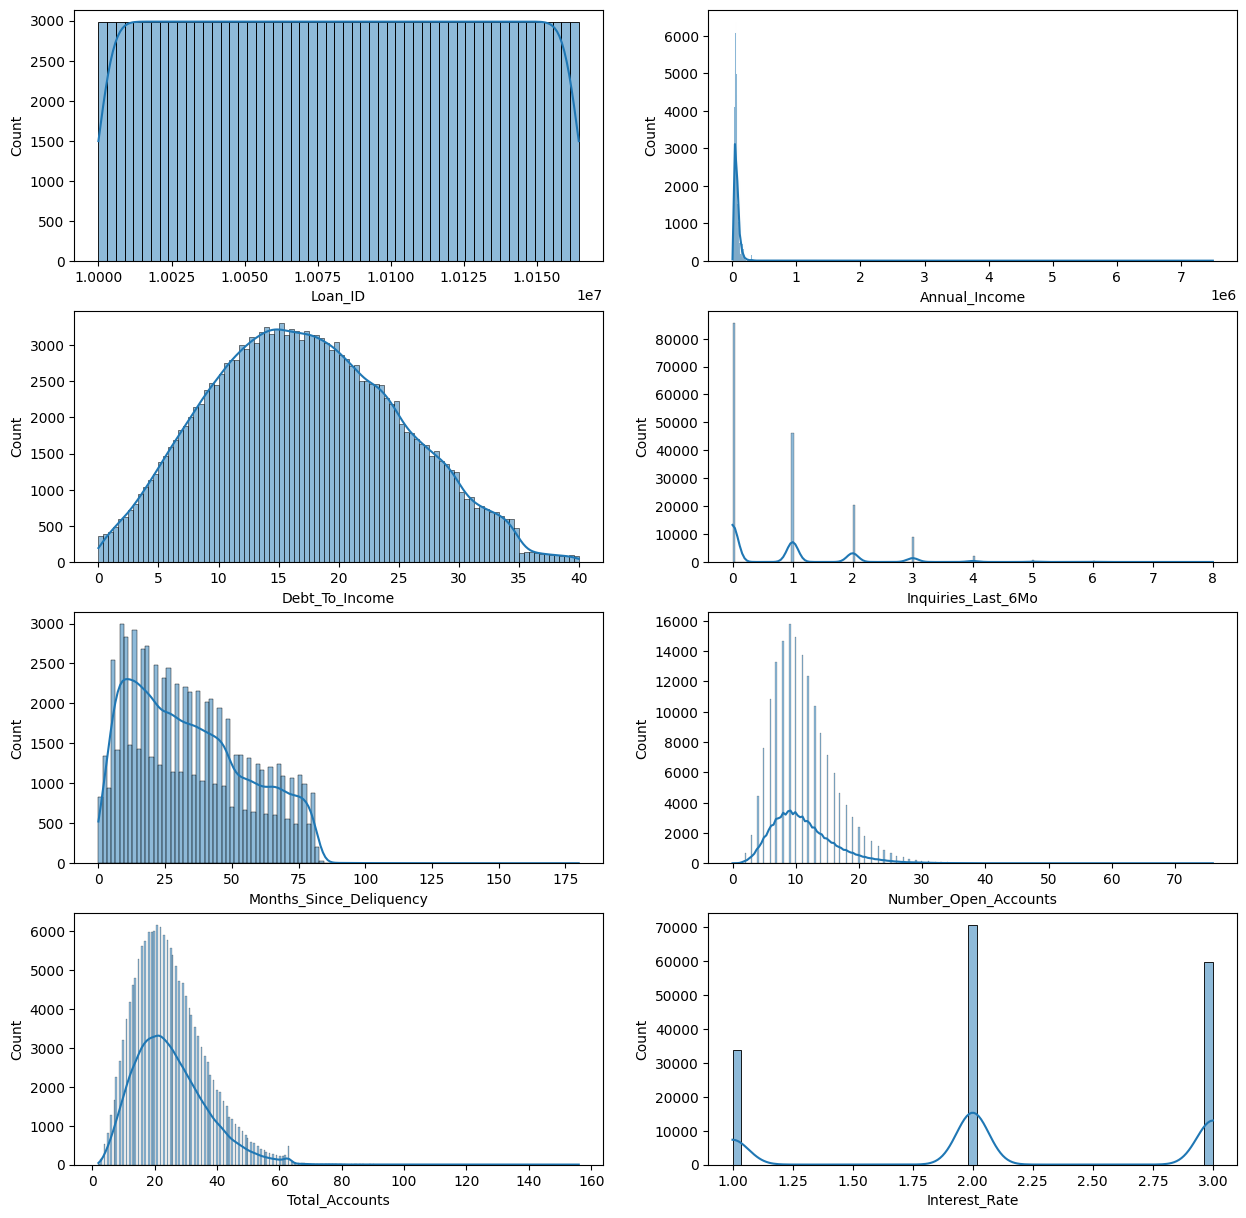

In [13]:
fig, axes = plt.subplots(4, 2, figsize = (15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(x = col, data = df, ax = axes[i], kde = True)
plt.show()

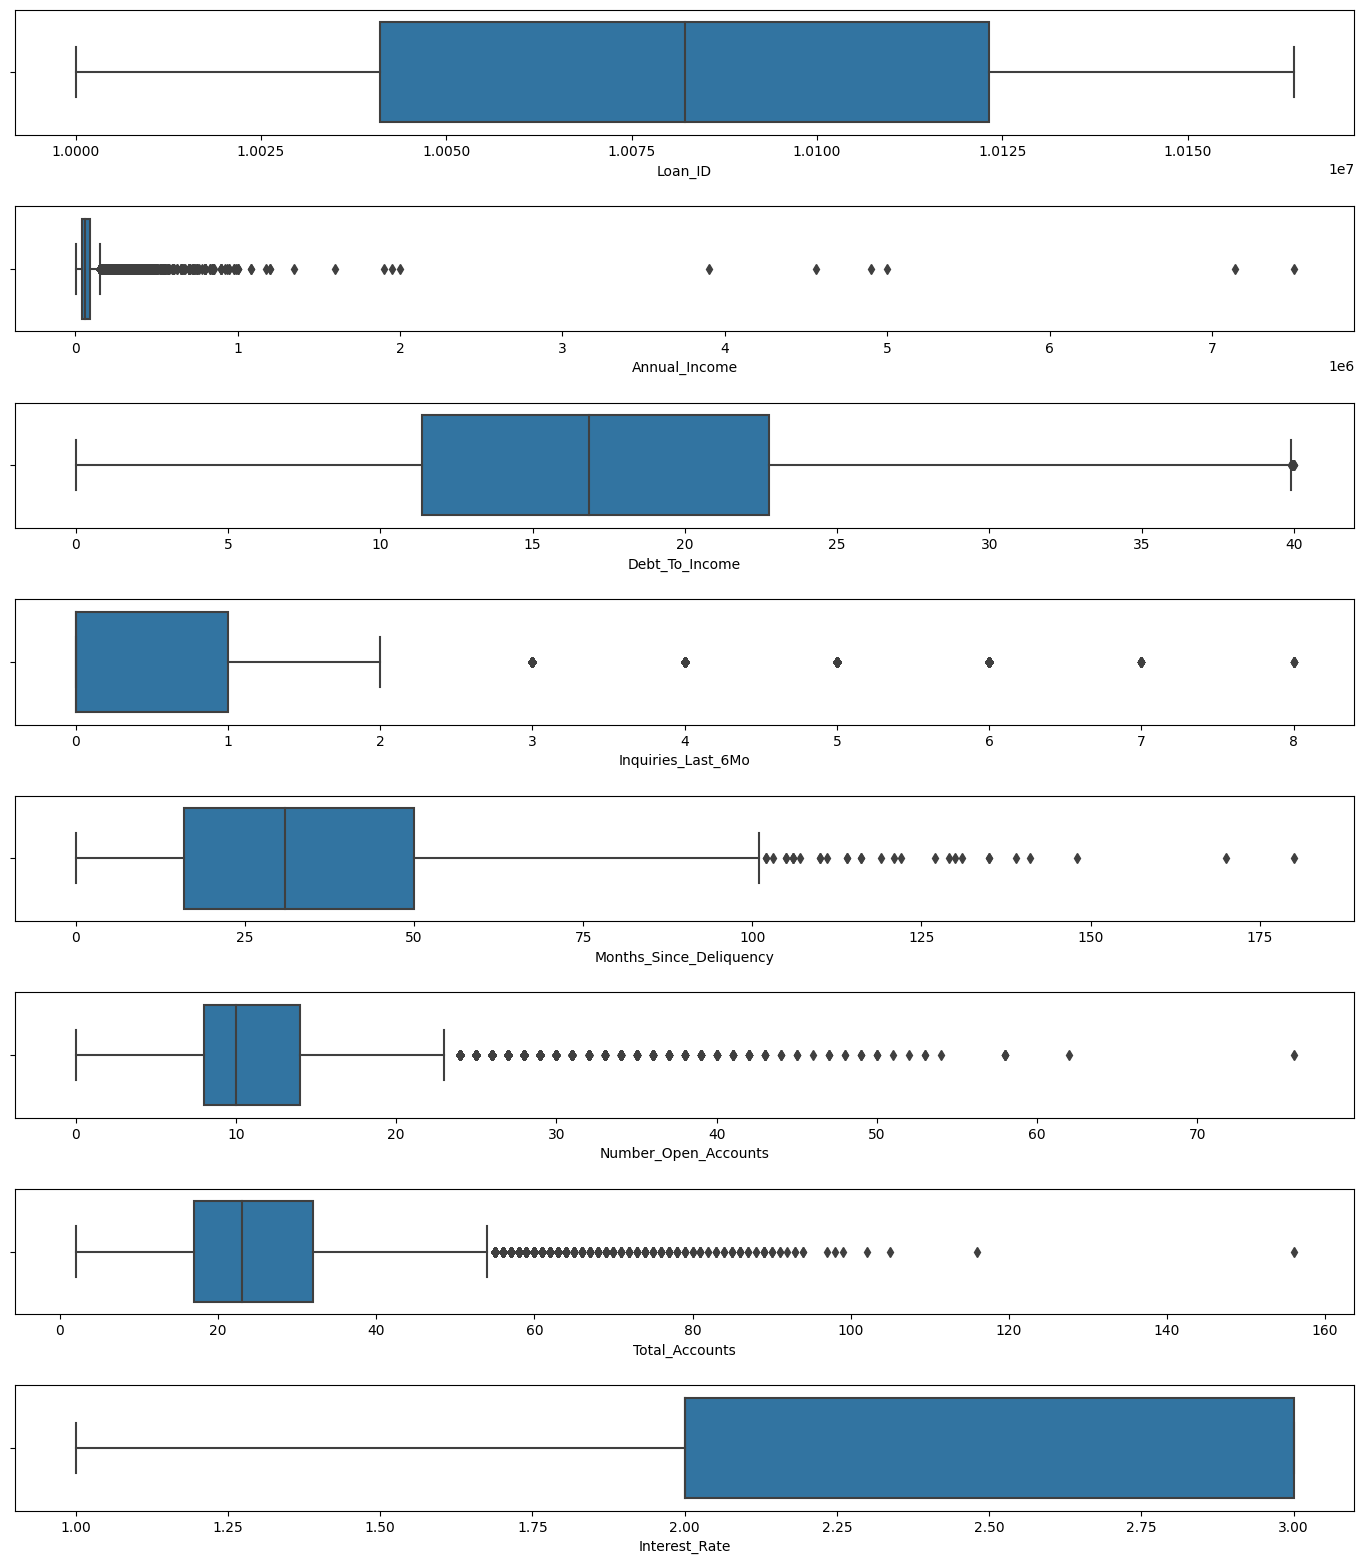

In [14]:
# Điểm outlier
fig, axes=plt.subplots(nrows = len(numerical_cols),ncols=1, figsize=(14, 2*len(numerical_cols)), sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df, ax = axes[i])
plt.tight_layout(pad=2.0)

In [15]:
nan_val_num_cols = [cols for cols in numerical_cols if (df[cols].isna().sum() != 0)]

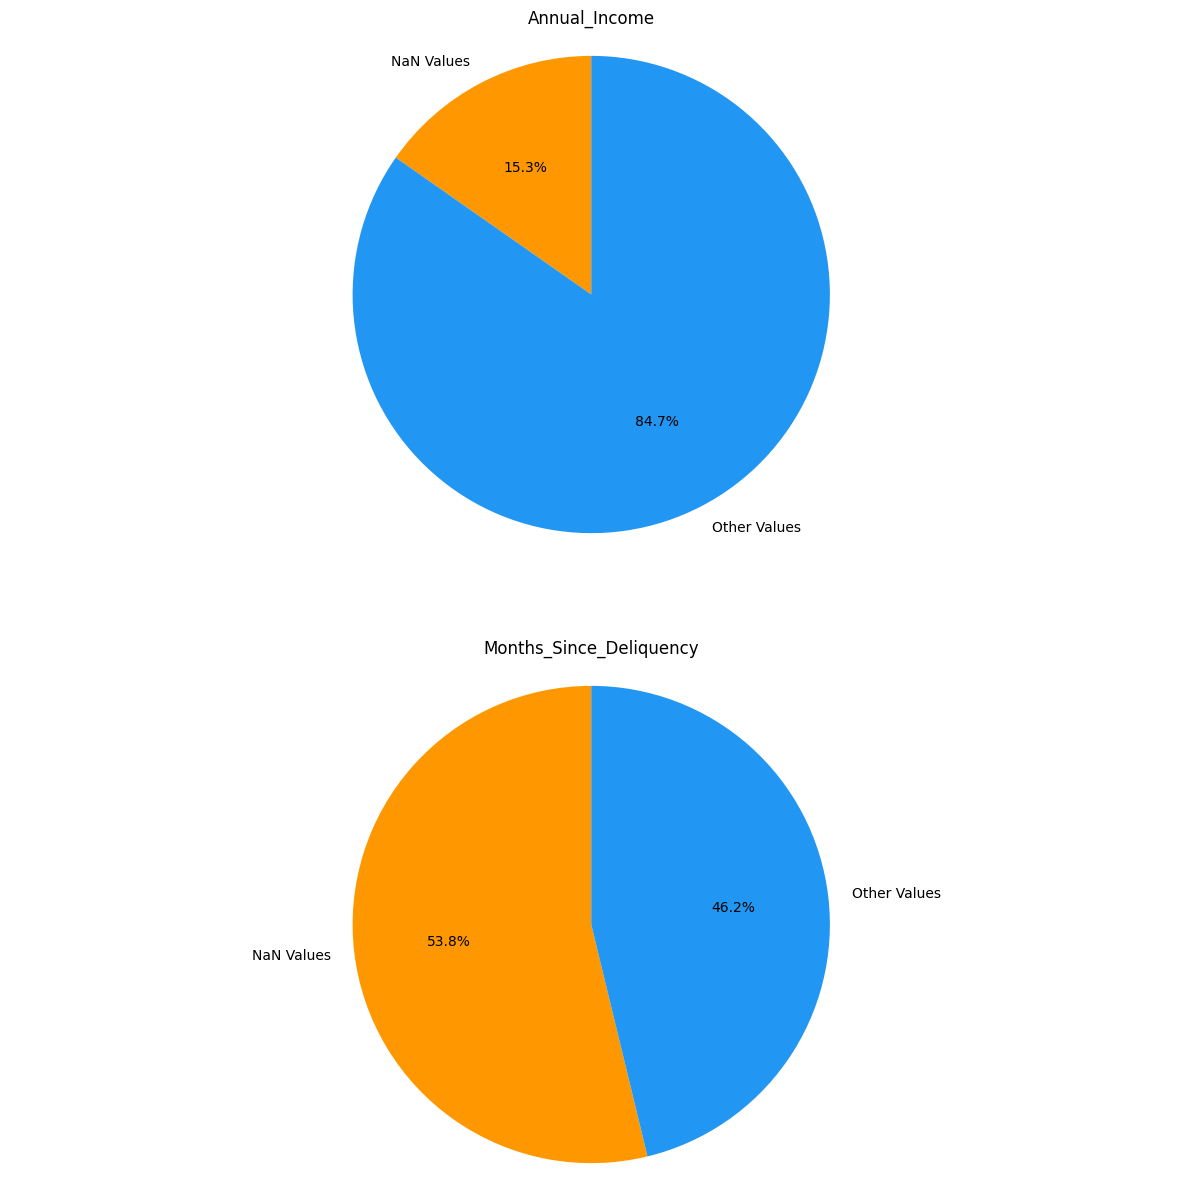

In [16]:
#Tỉ lệ giá trị nan
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
labels = ['NaN Values', 'Other Values']

for i, col in enumerate(nan_val_num_cols):
    counts = df[col].value_counts()
    nan = df[col].isna().sum()
    values = [nan, len(df) - nan]
    colors = ['#FF9800', '#2196F3']

    # Vẽ biểu đồ tròn
    axes[i].pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)
    axes[i].axis('equal')

# Hiển thị biểu đồ
plt.show()

*Categorical*

In [17]:
for col in categorical_cols:
    print(f"Unique values in column {col}: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print('\n')

Unique values in column Loan_Amount_Requested: 1290
Unique values: ['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']


Unique values in column Length_Employed: 11
Unique values: ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


Unique values in column Home_Owner: 5
Unique values: ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']


Unique values in column Income_Verified: 3
Unique values: ['not verified' 'VERIFIED - income' 'VERIFIED - income source']


Unique values in column Purpose_Of_Loan: 14
Unique values: ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']


Unique values in column Gender: 2
Unique values: ['Female' 'Male']




In [18]:
df[categorical_cols].isnull().sum()

Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25349
Income_Verified              0
Purpose_Of_Loan              0
Gender                       0
dtype: int64

In [19]:
#Cot khong chứa giá trị nan
no_nan_cols = [cols for cols in categorical_cols if (df[cols].isna().sum() == 0)]

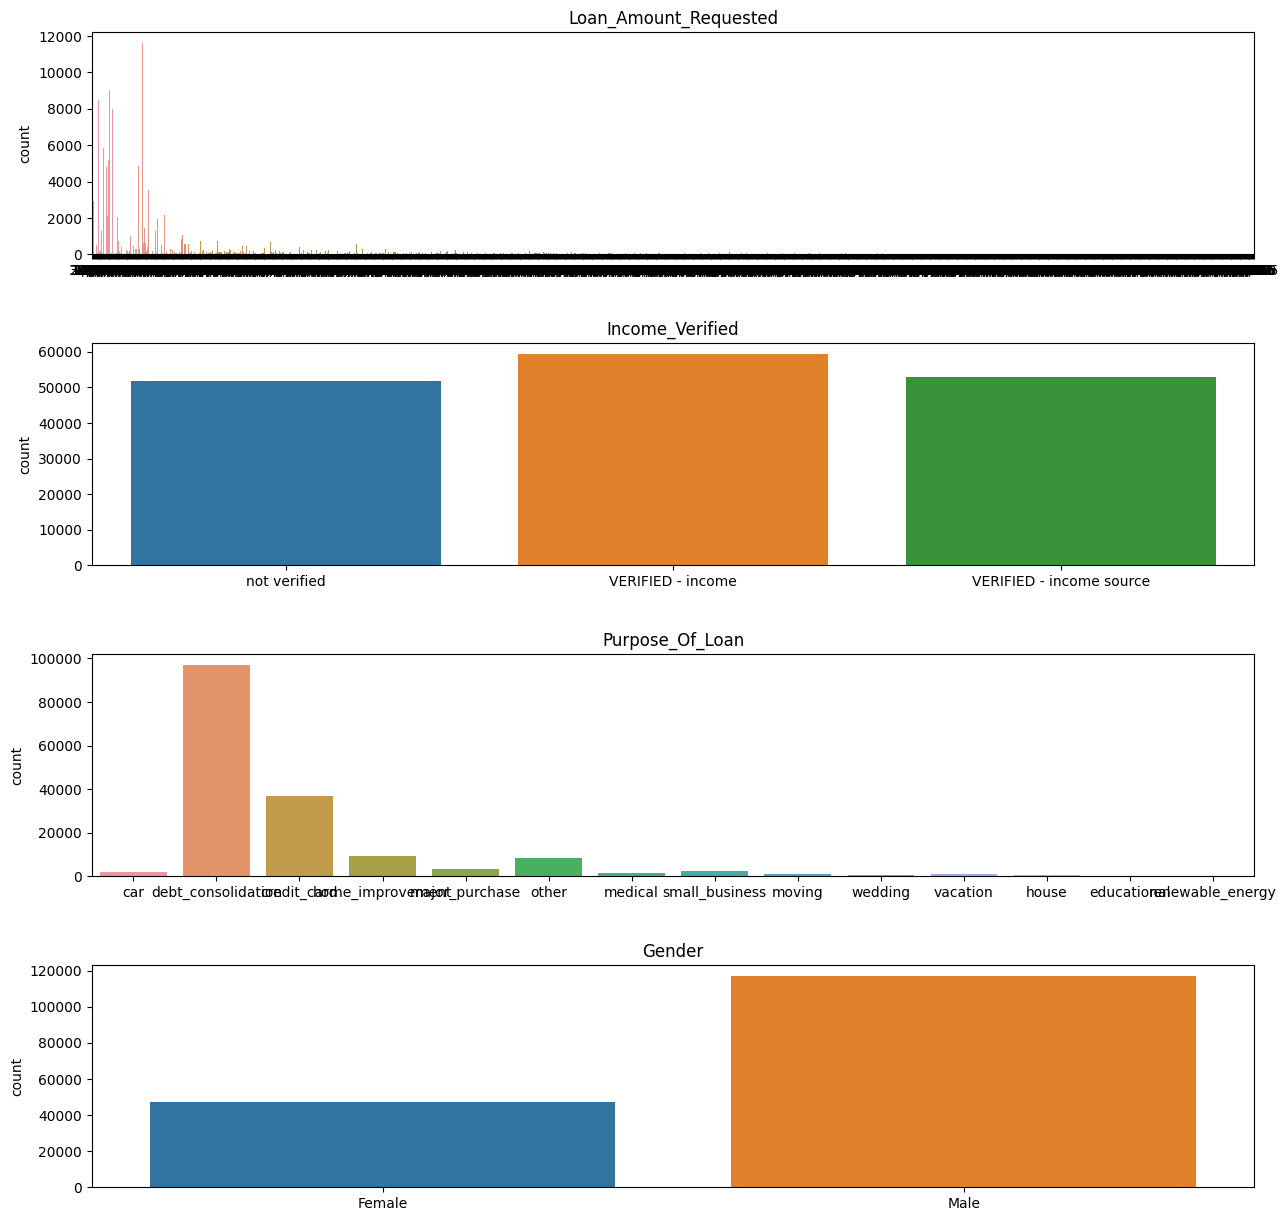

In [20]:
fig, axes = plt.subplots(nrows = len(no_nan_cols), ncols = 1, figsize = (15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.flatten()

for i, col in enumerate(no_nan_cols):
    sns.countplot(x = col, data = df, ax = axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
plt.show()

In [21]:
# Cột có giá trị nan.
nan_val_cols = [cols for cols in categorical_cols if (df[cols].isna().sum() != 0)]

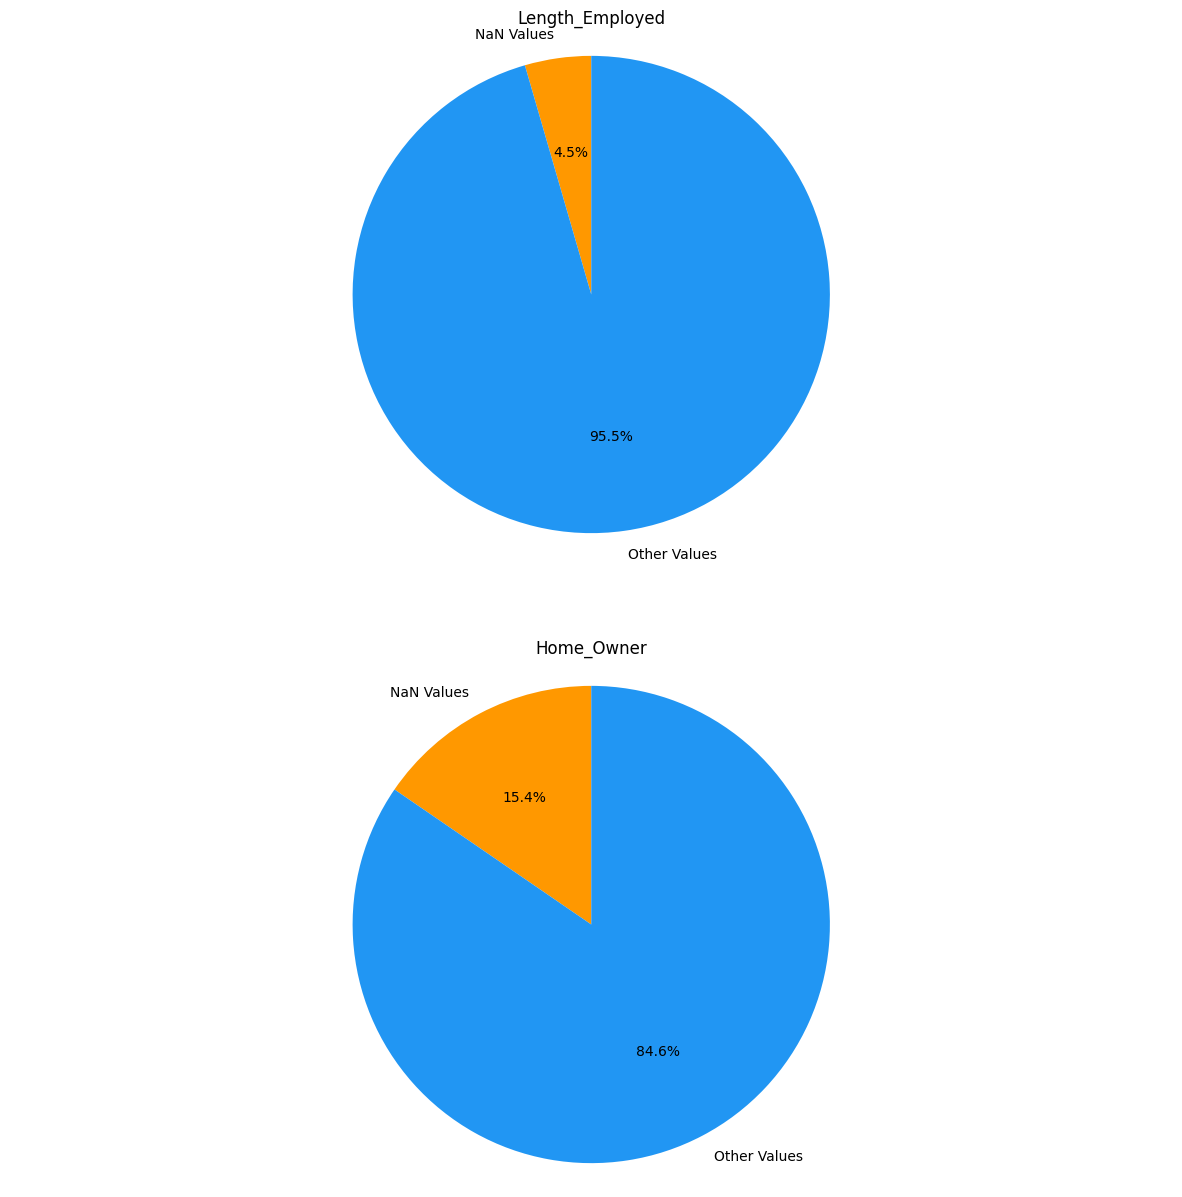

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
labels = ['NaN Values', 'Other Values']

for i, col in enumerate(nan_val_cols):
    counts = df[col].value_counts()
    nan = df[col].isna().sum()
    values = [nan, len(df) - nan]
    colors = ['#FF9800', '#2196F3']

    # Vẽ biểu đồ tròn
    axes[i].pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)
    axes[i].axis('equal')

# Hiển thị biểu đồ
plt.show()

**Nhận xét**

*Numerical*
- Các cột `Annual_Income` và `Months_Since_Deliquency` có chứa giá trị **Nan**. Cả 2 cột đều có giá trị **Nan** > 5%.
- Dựa vào boxplot các cột `Annual_Income`, `Debt_To_Income`, `Inquiries_Last_6Mol`, `Months_since_Deliquency`, `Number_Open_Accounts`, `Total_Accounts` có chứa giá trị **outlier**.  
- Dựa vào histplot cột `Annual_Income` và `Debt_To_Income` có vẻ liên quan với nhau nếu loại bỏ các giá trị outlier. Ngoài ra cột `Number_Open_Accounts` và `Total_Accounts` có vẻ cũng liên quan với nhau.

*Categorical*
- Cột `Loan_Amount_Requested` và `Length_Employed` theo quan sát có lẽ thuộc loại **numerical**
- Các cột `Length_Employed`, `Home_Owner` có các giá trị **Nan**. Trong đó:

  - Cột `length_Employed` chứa giá trị nan < 5%.
  - Cột `Home_Owner` chứa giá trị nan > 5%.

## **Preprocessing**

In [23]:
#Các cột cần xử lý outliers
outliers_value_cols = numerical_cols.copy()
outliers_value_cols.remove('Interest_Rate')

In [24]:
#Hàm xử lý outliier.
def outliers_value_preprocessing(data, features, threshold=1.5):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        data.loc[(data[feature] < lower_bound)
                                   | (data[feature] > upper_bound), feature] = np.nan

    return data

In [25]:
df = outliers_value_preprocessing(df, outliers_value_cols)

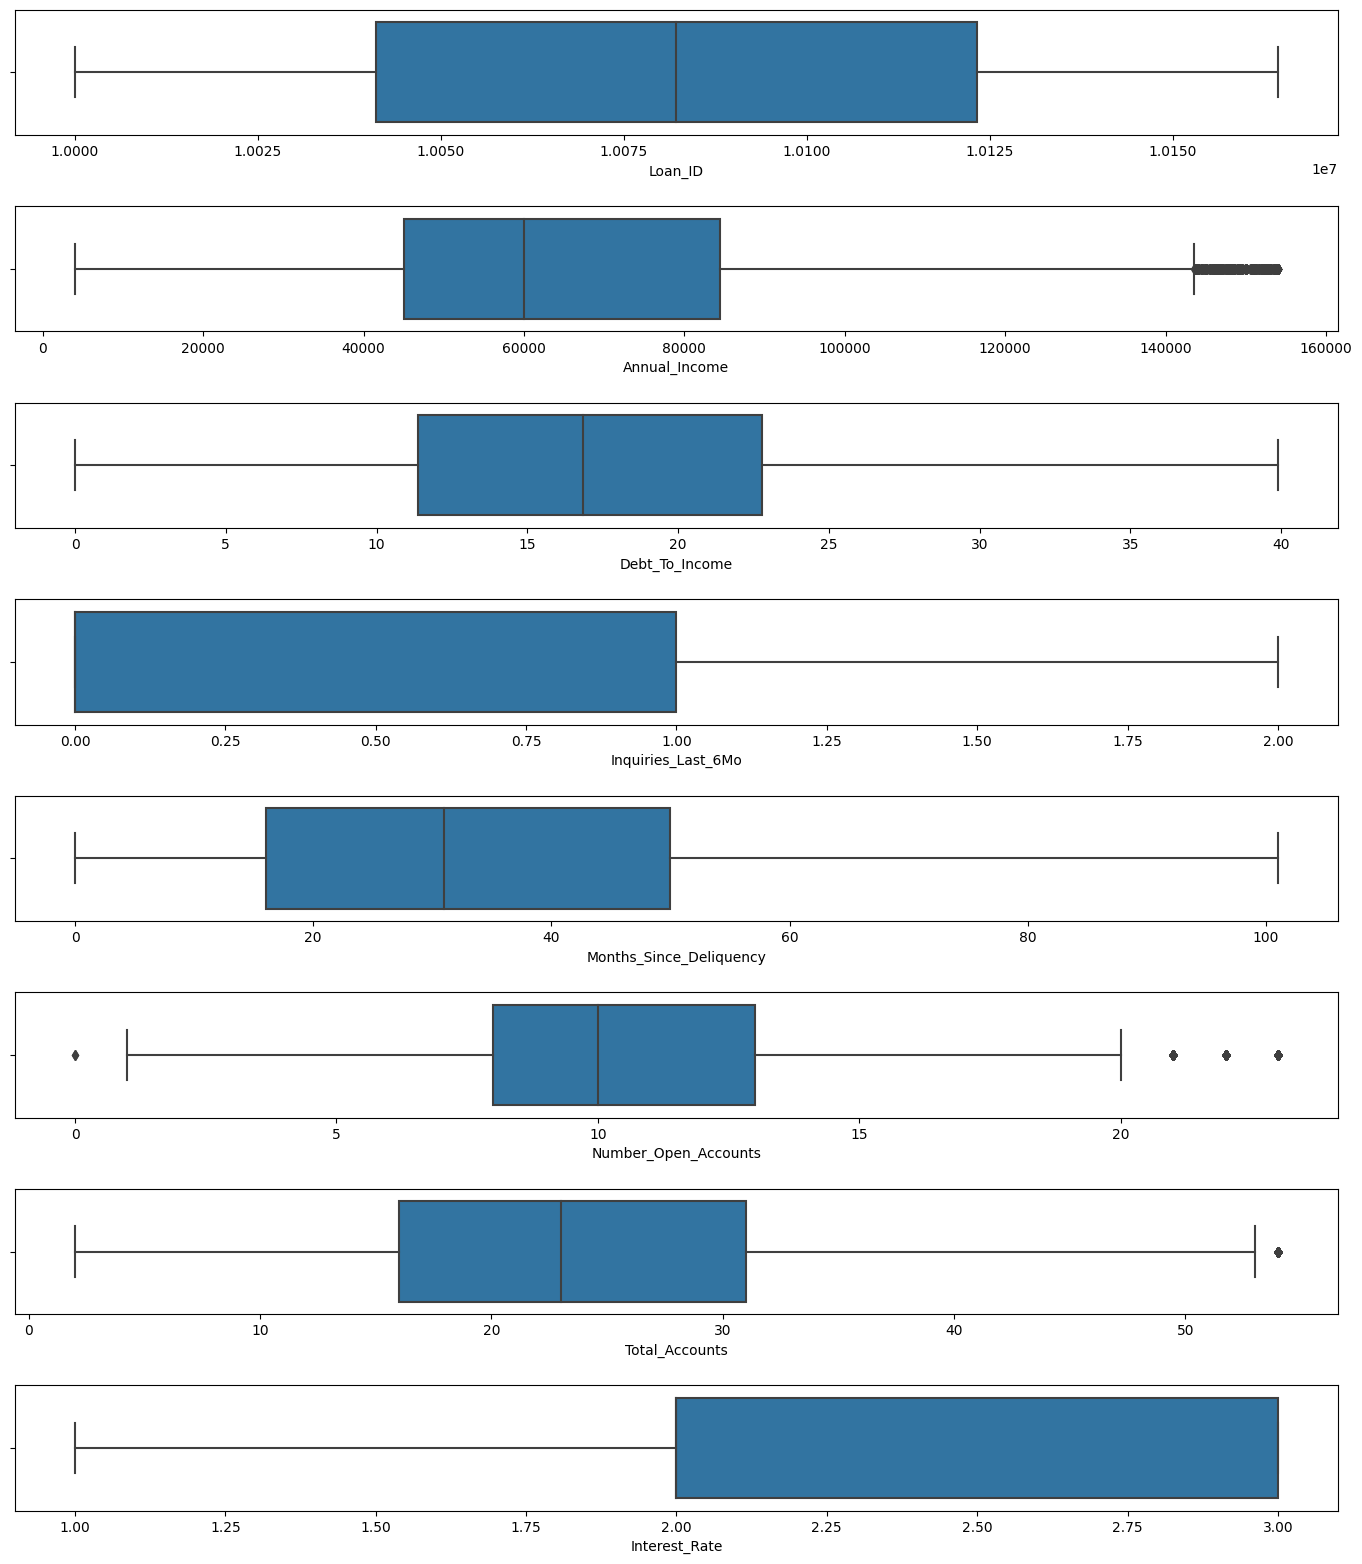

In [26]:
# Điểm outlier sau khi được xử lý
fig, axes=plt.subplots(nrows = len(numerical_cols),ncols=1, figsize=(14, 2*len(numerical_cols)), sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df, ax = axes[i])
plt.tight_layout(pad=2.0)

In [27]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              30983
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                12
Inquiries_Last_6Mo         12276
Months_Since_Deliquency    88409
Number_Open_Accounts        3754
Total_Accounts              3099
Gender                         0
Interest_Rate                  0
dtype: int64

In [28]:
#hàm xử lí giá trị null
def nan_value_preprocessing(data):
  for col in data.columns:
      if data[col].isnull().sum() != 0:
          if data[col].dtype=='object':
              data[col].fillna(data[col].mode()[0], inplace=True)
          else:
              data[col].fillna(np.median(data[col].dropna()),inplace=True)
  return data

In [29]:
def preprocessing_data(data):
    #Categorical
    #Cột 'Loan_Amount_Requested'
    data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(',','').astype('int')

    #Cột "Lenth_Employed"
    data["Length_Employed"].replace({"< 1 year": "L", '1 year': 'L', '2 years':'L', '3 years':'L'}, inplace=True)
    data["Length_Employed"].replace({"4 years": "M", '5 years': 'M', '6 years':'M', '7 years':'M'}, inplace=True)
    data["Length_Employed"].replace({"8 years": "E", '9 years': 'E', '10+ years':'E'}, inplace=True)
    data["Length_Employed"] = data["Length_Employed"].fillna("exp_NA")

    #Cột 'Home_Owner'
    data['Home_Owner'] = data['Home_Owner'].fillna(value = 'Other')
    data['Home_Owner'].replace('None', 'Other', inplace = True)

    #Numerical
    #Cột "Months_Since_Deliquency"
    data['Months_Since_Deliquency'] = data['Months_Since_Deliquency'].fillna(0)
    return data
preprocessed_df = preprocessing_data(df)

In [30]:
preprocessed_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                     0
Annual_Income              30983
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                12
Inquiries_Last_6Mo         12276
Months_Since_Deliquency        0
Number_Open_Accounts        3754
Total_Accounts              3099
Gender                         0
Interest_Rate                  0
dtype: int64

In [31]:
preprocessed_df = nan_value_preprocessing(preprocessed_df)

In [32]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  float64
 1   Loan_Amount_Requested    164309 non-null  int64  
 2   Length_Employed          164309 non-null  object 
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  float64
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  float64
 11  Total_Accounts           164309 non-null  float64
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

**Nhận xét**

*Categorical*
- Cột `Loan_Amount_Requested`có vẻ như thuộc loại **numerical** nên ta sẽ chuyển thành **numerical**
- Cột `Length_Employed` ta sẽ gom thành các loại:
  - nhỏ hơn 1 đến 3 năm ít kinh nghiêm(L)
  - 4 đên 7 năm khinh nghiệm trung(M)
  - 8 đến hơn 10 năm kinh nghiệm cao(E)
  - Nan xem là không có kinh nghiệm(exp_NA)
- Cột `Home_Owner` thay thế **Nan** thành **other**.

*Numerical*
- Xử lý **outlier** bằng cách sử dụng hàm **outliers_value_preprocessing**.   
- Cột `Months_Since_Deliquency` chứa hơn 50% giá trị **Nan**. Ta sẽ thay thế giá trị **Nan** thành **0** xem như là không có nợ.
- Những cột có giá **Nan** còn lại ta sử dụng dụng hàm **nan_value_preprocessing** để xử lý.

## **Feature Engineer**

In [33]:
def apply_feature_engineering(data):
    features = data.copy()

    cat_col_encoder = [ft for ft in features.columns if ft == "Length_Employed" or ft == "Gender"]
    for i in cat_col_encoder:
        features[i] = LabelEncoder().fit_transform(features[i])

    #Get_dummies
    cat_col_dummies = [ft for ft in features.columns if features[ft].dtype != cat_col_encoder]
    temp = pd.get_dummies(features[cat_col_dummies])
    features.drop(cat_col_dummies, axis=1, inplace=True)
    features = pd.concat([features, temp], axis = 1)
    return features

features = apply_feature_engineering(preprocessed_df)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 32 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_ID                                   164309 non-null  float64
 1   Loan_Amount_Requested                     164309 non-null  int64  
 2   Length_Employed                           164309 non-null  int64  
 3   Annual_Income                             164309 non-null  float64
 4   Debt_To_Income                            164309 non-null  float64
 5   Inquiries_Last_6Mo                        164309 non-null  float64
 6   Months_Since_Deliquency                   164309 non-null  float64
 7   Number_Open_Accounts                      164309 non-null  float64
 8   Total_Accounts                            164309 non-null  float64
 9   Gender                                    164309 non-null  int64  
 10  Interest_Rate       

<Axes: >

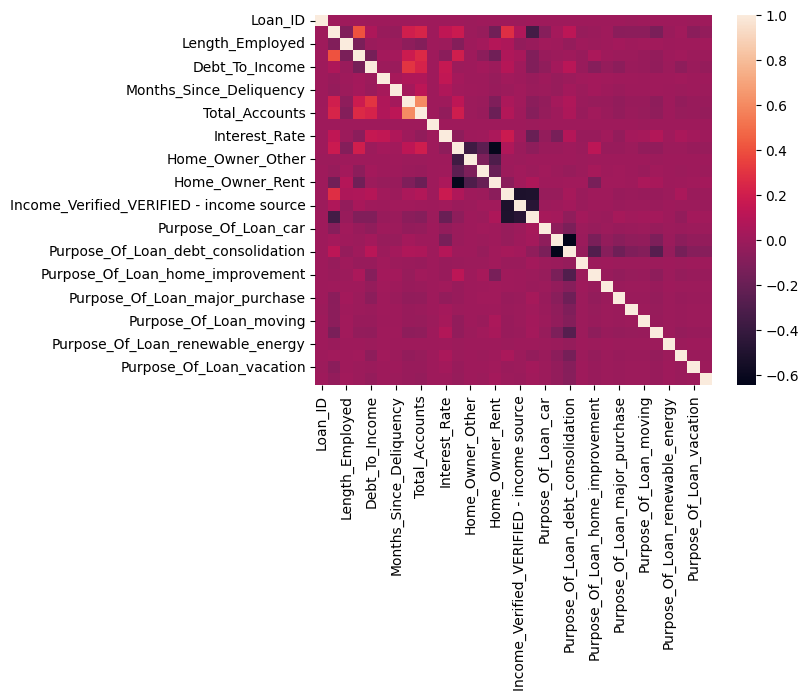

In [34]:
#Corr matrix
sns.heatmap(features.corr())

**Nhận xét**

- Cột `Length_Employed` và `Gender` sử dụng LabelEncoder để mã hóa.
- Các cột categorical còn lại ta sử dụng getdummies để mã hóa
- Với ma trận tương quan quan ta có thể thấy độ tương quan giữa các **features** và **taget** là không tốt.

In [35]:
from sklearn import preprocessing
def prepare_X_y(df):
    feature_names = df.columns.tolist()
    feature_names.remove("Interest_Rate")
    X = df[feature_names].values
    y = df.Interest_Rate.values
    return X, y
X, y = prepare_X_y(features)

## **Model training**

#### Train-test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

#### Feature Scaling

In [37]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

####**Grid_search**

**Linear_Regression**

In [ ]:
## Build Linear Regression model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def build_model(X, y):
    scaler = StandardScaler()
    model = LinearRegression()

    pipe = Pipeline(steps=[
        ("scaler", scaler),
        ("model", model)
    ])

    param_grid = {
            'model__fit_intercept': [True, False],
        }

    grid_search = GridSearchCV(pipe, param_grid, n_jobs=2)
    grid_search.fit(X, y)
    print("Best score : ", grid_search.best_score_)
    print("Best parameter : ", grid_search.best_params_)
    return grid_search

model = build_model(X_train, y_train)
pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_pred=pred, y_true=y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_pred=pred, y_true=y_test))
print("R-squared (R2):", r2_score(y_test, pred))

Best score :  0.14856897958370816
Best parameter :  {'model__fit_intercept': True}
Mean Squared Error (MSE): 0.46872082373023954
Mean Absolute Error (MAE): 0.569002148268651
R-squared (R2): 0.14217489570089847


**Logistic_regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def train_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test):
    # Tạo pipeline với scaler và logistic regression classifier
    pipeline = make_pipeline(StandardScaler(), LogisticRegression())

    # Thiết lập các giá trị tham số cho Grid Search
    param_grid = {
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__C': [0.01, 0.1, 1, 10],
        'logisticregression__solver': ['liblinear']
    }

    # Tìm kiếm lưới để tìm bộ tham số tốt nhất cho mô hình trong pipeline
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # In ra kết quả
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    # Đánh giá độ chính xác của mô hình với bộ tham số tốt nhất và in ra báo cáo đánh giá
    y_train_pred = grid_search.predict(X_train_scaled)
    y_test_pred = grid_search.predict(X_test_scaled)
    print("Training accuracy with best parameters: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy with best parameters: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện với bộ tham số tốt nhất trong pipeline
    return grid_search.best_estimator_

In [ ]:
train_logistic_regression(X_train_scale, X_test_scale, y_train, y_test)

Best parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best cross-validation score: 0.51
Training accuracy with best parameters: 0.51
Testing accuracy with best parameters: 0.50
              precision    recall  f1-score   support

           1       0.53      0.09      0.16      6721
           2       0.48      0.67      0.56     14018
           3       0.54      0.54      0.54     12123

    accuracy                           0.50     32862
   macro avg       0.52      0.43      0.42     32862
weighted avg       0.51      0.50      0.47     32862



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

**Naive Bayes**

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

def build_model(X, y):
    scaler = MinMaxScaler()
    model = GaussianNB()

    pipe = Pipeline(steps=[
        ("scaler", scaler),
        ("model", model)
    ])

    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'model__var_smoothing': var_smoothing_values
        }

    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X, y)
    print("Best score : ", search.best_score_)
    print("Best parameter : ", search.best_params_)

    return search

model = build_model(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

Best score :  0.48042175409271853
Best parameter :  {'model__var_smoothing': 3.3516026509388407e-07, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           1       0.36      0.17      0.23      6721
           2       0.46      0.74      0.57     14018
           3       0.57      0.34      0.42     12123

    accuracy                           0.47     32862
   macro avg       0.46      0.42      0.41     32862
weighted avg       0.48      0.47      0.45     32862



**Decision Tree**

In [ ]:
from sklearn.pipeline import make_pipeline
def train_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test):
    # Tạo pipeline với scaler và decision tree classifier
    pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

    # Thiết lập các giá trị tham số cho Grid Search
    param_grid = {
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__max_depth': [3, 4, 5],
        'decisiontreeclassifier__min_samples_split': [5,10,15],
        'decisiontreeclassifier__min_samples_leaf': [2, 3, 4]
    }

    # Tìm kiếm lưới để tìm bộ tham số tốt nhất cho mô hình trong pipeline
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # In ra kết quả
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    # Đánh giá độ chính xác của mô hình với bộ tham số tốt nhất và in ra báo cáo đánh giá
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Training accuracy with best parameters: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy with best parameters: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện với bộ tham số tốt nhất trong pipeline
    return grid_search.best_estimator_


In [ ]:
train_decision_tree(X_train_scale, X_test_scale, y_train, y_test)

Best parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 5}
Best cross-validation score: 0.49
Training accuracy with best parameters: 0.49
Testing accuracy with best parameters: 0.48
              precision    recall  f1-score   support

           1       0.54      0.10      0.16      6721
           2       0.46      0.70      0.56     14018
           3       0.52      0.44      0.48     12123

    accuracy                           0.48     32862
   macro avg       0.51      0.41      0.40     32862
weighted avg       0.50      0.48      0.45     32862



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=5))])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def train_mlp(X_train_scaled, X_test_scaled, y_train, y_test):
    # Scale dữ liệu sử dụng StandardScaler
    # Khởi tạo và huấn luyện mô hình MLP
    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100)
    mlp.fit(X_train_scaled, y_train)

    # Đánh giá độ chính xác của mô hình trên tập train và test
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    print("Training accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện
    return mlp
train_mlp(X_train_scale, X_test_scale, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.53
Testing accuracy: 0.51
              precision    recall  f1-score   support

           1       0.51      0.24      0.33      6721
           2       0.48      0.63      0.55     14018
           3       0.56      0.53      0.55     12123

    accuracy                           0.51     32862
   macro avg       0.52      0.47      0.47     32862
weighted avg       0.52      0.51      0.50     32862



MLPClassifier(hidden_layer_sizes=(50,), max_iter=100)

Train MLP với hàm kích hoạt là Relu

In [ ]:
def train_mlp(X_train_scaled, X_test_scaled, y_train, y_test):
    # Khởi tạo và huấn luyện mô hình MLP với các tham số được điều chỉnh
    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=0.001, activation='relu', learning_rate='constant', learning_rate_init=0.001, solver='adam')
    mlp.fit(X_train_scaled, y_train)

    # Đánh giá độ chính xác của mô hình trên tập train và test
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    print("Training accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện
    return mlp

# Thử các giá trị tham số khác nhau
train_mlp(X_train_scale, X_test_scale, y_train, y_test)


Training accuracy: 0.53
Testing accuracy: 0.52
              precision    recall  f1-score   support

           1       0.51      0.22      0.31      6721
           2       0.48      0.66      0.56     14018
           3       0.57      0.51      0.54     12123

    accuracy                           0.52     32862
   macro avg       0.52      0.46      0.47     32862
weighted avg       0.52      0.52      0.50     32862



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,), max_iter=100)

Train MLP với hàm kích hoạt là Tanh

In [ ]:
def train_mlp(X_train_scaled, X_test_scaled, y_train, y_test):
    # Khởi tạo và huấn luyện mô hình MLP với các tham số được điều chỉnh
    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=0.001, activation='tanh', learning_rate='constant', learning_rate_init=0.001, solver='adam')
    mlp.fit(X_train_scaled, y_train)

    # Đánh giá độ chính xác của mô hình trên tập train và test
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    print("Training accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện
    return mlp
# Thử các giá trị tham số khác nhau
mlp_model = train_mlp(X_train_scale, X_test_scale, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.53
Testing accuracy: 0.51
              precision    recall  f1-score   support

           1       0.50      0.23      0.32      6721
           2       0.48      0.62      0.54     14018
           3       0.56      0.54      0.55     12123

    accuracy                           0.51     32862
   macro avg       0.51      0.47      0.47     32862
weighted avg       0.51      0.51      0.50     32862



Train MLP với hàm kích hoạt là Logistic

In [ ]:
def train_mlp(X_train_scaled, X_test_scaled, y_train, y_test):
    # Khởi tạo và huấn luyện mô hình MLP với hàm kích hoạt logistic
    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=0.001, activation='logistic', learning_rate='constant', learning_rate_init=0.001, solver='adam')
    mlp.fit(X_train_scaled, y_train)

    # Đánh giá độ chính xác của mô hình trên tập train và test
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    print("Training accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Testing accuracy: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    print(classification_report(y_test, y_test_pred))

    # Trả về mô hình đã được huấn luyện
    return mlp

# Thử các giá trị tham số khác nhau
mlp_model = train_mlp(X_train_scale, X_test_scale, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.53
Testing accuracy: 0.51
              precision    recall  f1-score   support

           1       0.49      0.27      0.35      6721
           2       0.49      0.59      0.53     14018
           3       0.55      0.57      0.56     12123

    accuracy                           0.51     32862
   macro avg       0.51      0.47      0.48     32862
weighted avg       0.51      0.51      0.51     32862



**Nhận xét**

Kết quả của các model sử dụng `decision tree`, `LogicticRegression`và `Naive bayes` với tham số đã được tối ưu có giá trị accuracy score lần lượt là 0.48, 0.51 và 0.47 trên tập test. Và giá trị trên tập train cũng gần tương đương với tập test nên không bị overfitting.

Model sử dụng `MLP` ta thử train theo nhiều hàm kích hoạt khác nhau như 'logictic', 'tanh', 'relu' với tham số hidden_layer_sizes=(50,), max_iter=100, learning_rate='constant', learning_rate_init=0.001, solver='adam' kết quả nhận được giá trị accuracy_score khá tương đương nhau, giá trị accuracy_score tốt nhất là model sử dụng hàm kích hoạt mặc định.Các giá trị accuracy_score khá gần nhau nên không bị overfitting.

Từ những điều trên cho thấy rằng các model sử dụng `MLP` hoạt động tốt hơn các model khác. Tuy nhiên giá trị accuracy_score còn khá thấp mode bị underfitting. Có lẽ bước phân tích dữ liệu có nhiều vấn đề.